# Data Exploration- Kaggle Database
- Robert Shaw, Spencer Evans, Sean Coleman, Daniel Alper
- CS109a Project - Data Driven March Madness

In this file, we explore the kaggle database, by generating a few basic predictors of games and exploring how they correlate with the number of tournament wins. Each possible predictor is stored in the same way. Team ID is each column and Year is each row. This consistent storage makes it easier when we are building models later to query the database.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import data_processing_functions as dpf

# Data Mining and Cleaning - Kaggle Database
- Import data

In [3]:
# read in the dataset
regular_season_compact = pd.read_csv("datasets/kaggle_data/MRegularSeasonCompactResults.csv")

# add score differential
regular_season_compact["Diff"] = regular_season_compact["WScore"] - regular_season_compact["LScore"]
print(regular_season_compact.shape)
regular_season_compact.head()

(170738, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Diff
0,1985,20,1228,81,1328,64,N,0,17
1,1985,25,1106,77,1354,70,H,0,7
2,1985,25,1112,63,1223,56,H,0,7
3,1985,25,1165,70,1432,54,H,0,16
4,1985,25,1192,86,1447,74,H,0,12


Season: Year

Daynum: Index of Date of the Game Played Relative to First Day of the Season

WTeam : ID of Winning Team

WScore: Score of Winning Team

LTeam : ID of Losing Team

LScore: Score of Losing Team

Wloc  : Winner Home or Away

Numot : Number of OT periods

In [4]:
# read in the dataset
regular_season_detailed = pd.read_csv("datasets/kaggle_data/MRegularSeasonDetailedResults.csv")

print(regular_season_detailed.shape)
regular_season_detailed.head()

(96687, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


Detailed Scoring including various basketball stats of each game: Refer to https://www.kaggle.com/c/march-machine-learning-mania-2016/ for more info.

In [5]:
# read in the dataset
tourney_compact = pd.read_csv("datasets/kaggle_data/MNCAATourneyCompactResults.csv")

print(tourney_compact.shape)
tourney_compact.head()

(2251, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


Same as Regular Season Compact, except these are Tournament Games.

In [6]:
# read in the dataset
tourney_detailed = pd.read_csv("datasets/kaggle_data/MNCAATourneyDetailedResults.csv")

print(tourney_detailed.shape)
tourney_detailed.head()

(1115, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


Same as Regular Season Detailed, except these are Tournament Games and we only have data since 2003.

In [7]:
# read in the dataset
teams = pd.read_csv("datasets/kaggle_data/MTeams.csv")

print(teams.shape)
teams.head()

(371, 4)


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2021
1,1102,Air Force,1985,2021
2,1103,Akron,1985,2021
3,1104,Alabama,1985,2021
4,1105,Alabama A&M,2000,2021


In [8]:
# read in the dataset
seeds = pd.read_csv("datasets/kaggle_data/MNCAATourneySeeds.csv")

print(seeds.shape)
seeds.head()

(2354, 3)


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [9]:
# read in the dataset
slots = pd.read_csv("datasets/kaggle_data/MNCAATourneySlots.csv")

print(slots.shape)
slots.head()

(2318, 4)


,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


Slot is where the game is on a bracket. R1W5 is a first round game in the West Region played by the 5 Seed in the West versus the 12 Seed in the West.

# Data Exploration - Kaggle Database

In [10]:
min_season = seeds["Season"].min()
max_season = seeds["Season"].max()
min_team = teams["TeamID"].min()
max_team = teams["TeamID"].max()

- In Tournament Information

In [12]:
# filter seeds into a array by year
seeds_by_year = dpf.filter_into_seasons(seeds)

In [13]:
# returns true if a team was in the tournment in a season
def is_tourney_team(team_id, season, seed_arr):
    # extract seeds of the season in question
    year = seed_arr[season - 1985]
    # check if the id is in the season
    return team_id in year["TeamID"].unique()

In [14]:
seeds["Season"].max()-seeds["Season"].min() + 1

37

In [15]:
# 0, 1 matrix of whether a team was in the tournament in a given year
in_tourney_matrix_np = np.zeros((seeds["Season"].max()-seeds["Season"].min() + 1, 371))

# iterate seasons
for season in range(seeds["Season"].min(), seeds["Season"].max() + 1):
    # iterate teams
    if season != '2020':
        for team in range(teams["TeamID"].min(), teams["TeamID"].max() + 1):
            # 1 if in tournament, 0 otherwise
            if is_tourney_team(team, season, seeds_by_year):
                in_tourney_matrix_np[season - seeds["Season"].min(), team - teams["TeamID"].min()] = 1

In [16]:
# compute matrix of indicators of whether a team was in the tournament in a given year
in_tourney_matrix = pd.DataFrame(data=in_tourney_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
in_tourney_matrix.to_csv("datasets/generated_data/in_tourney_matrix")

In [17]:
print(in_tourney_matrix.shape)
in_tourney_matrix.head()

(37, 371)


TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# testing, we should see 64 teams per year for most years (more in the most recent due to expanded tournament)
print(in_tourney_matrix.sum(axis=1))

1985    64.0
1986    64.0
1987    64.0
1988    64.0
1989    64.0
1990    64.0
1991    64.0
1992    64.0
1993    64.0
1994    64.0
1995    64.0
1996    64.0
1997    64.0
1998    64.0
1999    64.0
2000    64.0
2001    65.0
2002    65.0
2003    65.0
2004    65.0
2005    65.0
2006    65.0
2007    65.0
2008    65.0
2009    65.0
2010    65.0
2011    68.0
2012    68.0
2013    68.0
2014    68.0
2015    68.0
2016    68.0
2017    68.0
2018    68.0
2019    68.0
2020     0.0
2021    68.0
dtype: float64


In [19]:
# returns the seed of a team in a given year, returns N/A if not in tourney
def seed_of_tourney_team(team_id, season, seed_arr):
    if is_tourney_team(team_id, season, seed_arr):
        # exract seeds of the season in question
        year = seed_arr[season - 1985]
        
        # extract index of the team
        index = year[year["TeamID"] == team_id].index[0]
        
        # return the seed
        return year.loc[index, "Seed"]
    
    else:
        return np.nan

In [20]:
# matrix seeds of teams by year
seeds_2d_arr = []

# iterate seasons
for season in range(seeds["Season"].min(), seeds["Season"].max() + 1):
    season_arr = []
    # iterate teams
    for team in range(teams["TeamID"].min(), teams["TeamID"].max() + 1):
        # get seed of team in a given year
        season_arr.append(seed_of_tourney_team(team, season, seeds_by_year))
        
    seeds_2d_arr.append(season_arr)    

In [21]:
# compute matrix of indicators of whether a team was in the tournament in a given year
seeds_matrix = pd.DataFrame(data=seeds_2d_arr, columns=teams["TeamID"], index=range(min_season,max_season+1))
seeds_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,NaN,NaN,NaN,X07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,X15,Y05,NaN,NaN,NaN,NaN,NaN,NaN,...,Y12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,X02,NaN,NaN,NaN,NaN,NaN,NaN,...,Y13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,Z06,NaN,NaN,NaN,NaN,NaN,NaN,...,Z14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wins and Losses Information (Regular Season and Post Season)

- Regular Season

In [22]:
# filter regular season data into years
regular_season_by_year = dpf.filter_into_seasons(regular_season_compact)

In [23]:
# counts of a teams wins and losses
regular_wins_matrix_np = np.zeros((seeds["Season"].max()-seeds["Season"].min() + 1, teams["TeamID"].max() - teams["TeamID"].min() + 1))
regular_loss_matrix_np = np.zeros((seeds["Season"].max()-seeds["Season"].min() + 1, teams["TeamID"].max() - teams["TeamID"].min() + 1))

# iterate seasons
for season in range(seeds["Season"].min(), seeds["Season"].max() + 1):
    # extract season
    regular_season = regular_season_by_year[season - seeds["Season"].min()]
    
    # count wins/losses
    win_counts = regular_season["WTeamID"].value_counts(sort=False) 
    loss_counts = regular_season["LTeamID"].value_counts(sort=False) 
    
    # iterate teams
    for team in range(teams["TeamID"].min(), teams["TeamID"].max() + 1):
        # if a team has a win in the year, extract from wins count
        if team in win_counts.index:
            regular_wins_matrix_np[season - seeds["Season"].min(), team - teams["TeamID"].min()] = win_counts[team]
        # otherwise 0 wins
        else:
            regular_wins_matrix_np[season - seeds["Season"].min(), team - teams["TeamID"].min()] = 0
            
        # if a team has a loss in the year, extract from loss count
        if team in loss_counts.index:
            regular_loss_matrix_np[season - seeds["Season"].min(), team - teams["TeamID"].min()] = loss_counts[team]
        # otherwise 0 loss
        else:
            regular_loss_matrix_np[season - seeds["Season"].min(), team - teams["TeamID"].min()] = 0

In [24]:
# compute matrix of wins and losses for a team in a given year
regular_wins_matrix = pd.DataFrame(data=regular_wins_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
regular_loss_matrix = pd.DataFrame(data=regular_loss_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))

regular_wins_matrix.to_csv("datasets/generated_data/regular_season_wins_matrix")
regular_loss_matrix.to_csv("datasets/generated_data/regular_season_loss_matrix")

In [25]:
print(regular_wins_matrix.shape)
regular_wins_matrix.head()

(37, 371)


TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,5.0,9.0,21.0,0.0,10.0,0.0,19.0,1.0,7.0,...,15.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,6.0,18.0,22.0,0.0,8.0,0.0,14.0,5.0,7.0,...,23.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,8.0,18.0,26.0,0.0,12.0,0.0,5.0,9.0,9.0,...,14.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,7.0,18.0,13.0,0.0,6.0,0.0,7.0,9.0,13.0,...,24.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,10.0,21.0,23.0,0.0,11.0,0.0,4.0,8.0,14.0,...,20.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
print(regular_loss_matrix.shape)
regular_loss_matrix.head()

(37, 371)


TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,19.0,14.0,9.0,0.0,14.0,0.0,6.0,23.0,18.0,...,13.0,12.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,19.0,7.0,8.0,0.0,16.0,0.0,11.0,19.0,18.0,...,4.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,15.0,8.0,4.0,0.0,13.0,0.0,20.0,15.0,14.0,...,12.0,12.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,17.0,7.0,17.0,0.0,19.0,0.0,19.0,15.0,14.0,...,3.0,14.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,14.0,7.0,7.0,0.0,15.0,0.0,20.0,16.0,11.0,...,11.0,17.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Tourney Season

In [27]:
tourney_compact['Season'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [28]:
# filter post season into sections
tourney_by_year = dpf.filter_into_seasons(tourney_compact)

# counts of a teams wins and losses
tourney_wins_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))
tourney_loss_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# iterate seasons
for season in range(min_season, max_season):
    
    if(season in tourney_compact['Season'].unique()):
        # extract season
        tourney_season = tourney_by_year[season - min_season]

        # count wins
        win_counts = tourney_season["WTeamID"].value_counts(sort=False) 
        loss_counts = tourney_season["LTeamID"].value_counts(sort=False) 

        # iterate teams
        for team in range(min_team, max_team):
            # if a team has a win in the year, extract from wins count
            if team in win_counts.index:
                tourney_wins_matrix_np[season - min_season, team - min_team] = win_counts[team]
            # otherwise 0 wins
            else:
                tourney_wins_matrix_np[season - min_season, team - min_team] = 0

            # if a team has a loss in the year, extract from loss count
            if team in loss_counts.index:
                tourney_loss_matrix_np[season - min_season, team - min_team] = loss_counts[team]
            # otherwise 0 loss
            else:
                tourney_loss_matrix_np[season - min_season, team - min_team] = 0

In [29]:
# compute matrix of wins and losses for a team in a given year
tourney_wins_matrix = pd.DataFrame(data=tourney_wins_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
tourney_loss_matrix = pd.DataFrame(data=tourney_loss_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))

tourney_wins_matrix.to_csv("datasets/generated_data/tourney_wins_matrix")
tourney_loss_matrix.to_csv("datasets/generated_data/tourney_loss_matrix")

tourney_wins_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Score Dif in Wins/ Losses
regular_avg_dif_np = np.zeros((max_season- min_season+ 1, max_team-min_team+ 1))
regular_std_dif_np = np.zeros((max_season- min_season+ 1, max_team-min_team+ 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    regular_season = regular_season_by_year[season - min_season]
    # iterate teams
    for team in range(teams["TeamID"].min(), teams["TeamID"].max() + 1):
        # indexes of wins and losses for a given team
        wins_diff = regular_season[regular_season["WTeamID"] == team]["Diff"].values
        loss_diff = regular_season[regular_season["LTeamID"] == team]["Diff"].values * -1.0
        
        # array to hold 
        diff_arr = np.concatenate([wins_diff, loss_diff], axis=0)

        # compute average/std of differences
        if np.size(diff_arr) != 0:
            avg_diff = np.average(diff_arr)
            std_diff = np.std(diff_arr)
        else:
            avg_diff = np.nan
            std_diff = np.nan
            
        # fill buffers
        regular_avg_dif_np[season - min_season, team - min_team] = avg_diff
        regular_std_dif_np[season - min_season, team - min_team] = std_diff     

In [31]:
# compute matrix of wins and losses for a team in a given year
regular_avg_diff_matrix = pd.DataFrame(data=regular_wins_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
regular_std_diff_matrix = pd.DataFrame(data=regular_loss_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))

regular_avg_diff_matrix.to_csv("datasets/generated_data/regular_season_avg_score_differential_matrix")
regular_std_diff_matrix.to_csv("datasets/generated_data/regular_season_std_score_differential_matrix")

In [32]:
# win percentage matrix
win_percentage_np = np.zeros((max_season- min_season+ 1, max_team-min_team+ 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # wins, losses games
        wins = float(regular_wins_matrix.loc[season, team])
        losses = float(regular_loss_matrix.loc[season, team])
        games = wins + losses
        
        # win percentage, nan if 0 games played
        if games != 0:
            win_percentage_np[season - min_season, team - min_team] = wins/games
        else:
            win_percentage_np[season - min_season, team - min_team] = np.nan          

In [33]:
# compute win percentages of each team over a given year
win_percentage_matrix = pd.DataFrame(data=win_percentage_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
win_percentage_matrix.head()

win_percentage_matrix.to_csv("datasets/generated_data/regular_season_win_percentage_matrix")

In [34]:
# win percentage matrix
opponents_wins_np = np.zeros((max_season - min_season+ 1, max_team - min_team+ 1))
opponents_games_np = np.zeros((max_season-  min_season+ 1, max_team - min_team+ 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # opponents 
        win_opponents = regular_season[regular_season["WTeamID"] == team]["LTeamID"].values
        loss_opponents = regular_season[regular_season["LTeamID"] == team]["WTeamID"].values

        # counts of wins, losses of opponents
        opponent_wins = 0.0
        opponent_losses = 0.0
        
        # iterate opponents
        for opponent in win_opponents:
            opponent_wins = opponent_wins + regular_wins_matrix.loc[season, opponent]
            opponent_losses = opponent_losses + regular_loss_matrix.loc[season, opponent]
    
        for opponent in loss_opponents:
            opponent_wins = opponent_wins + regular_wins_matrix.loc[season, opponent]
            opponent_losses = opponent_losses + regular_loss_matrix.loc[season, opponent]
        
        # counts of games of opponents
        opponent_games = opponent_wins + opponent_losses

        # fill buffers
        opponents_wins_np[season - min_season, team - min_team] = opponent_wins
        opponents_games_np[season - min_season, team - min_team] = opponent_games

In [35]:
# compute win oppponents wins and games
opponents_wins_matrix = pd.DataFrame(data=opponents_wins_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
opponents_wins_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,339.0,275.0,442.0,0.0,283.0,0.0,285.0,295.0,345.0,...,409.0,244.0,336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,349.0,272.0,453.0,0.0,295.0,0.0,318.0,277.0,352.0,...,319.0,242.0,314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,327.0,321.0,453.0,0.0,278.0,0.0,335.0,216.0,326.0,...,336.0,290.0,356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,343.0,284.0,480.0,0.0,352.0,0.0,376.0,267.0,359.0,...,298.0,287.0,355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,357.0,316.0,430.0,0.0,334.0,0.0,327.0,317.0,316.0,...,466.0,282.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
opponents_games_matrix = pd.DataFrame(data=opponents_games_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
opponents_games_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,670.0,575.0,833.0,0.0,606.0,0.0,638.0,624.0,668.0,...,752.0,591.0,675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,693.0,645.0,834.0,0.0,633.0,0.0,657.0,616.0,677.0,...,722.0,578.0,668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,649.0,671.0,851.0,0.0,668.0,0.0,672.0,607.0,622.0,...,713.0,644.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,684.0,643.0,851.0,0.0,683.0,0.0,712.0,632.0,736.0,...,731.0,669.0,714.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,697.0,728.0,869.0,0.0,675.0,0.0,646.0,659.0,698.0,...,879.0,680.0,628.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# win percentage of opponents (used in RPI calculation)
opponents_win_percentage_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# iterate to fill
for season in range(min_season, max_season + 1):
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # extract info
        wins = float(opponents_wins_matrix.loc[season, team])
        games = float(opponents_games_matrix.loc[season, team])
        
        # check for divide by 0
        if games != 0:
            # win percentage
            opponents_win_percentage_np[season - min_season, team - min_team] = wins/games
        else:
            opponents_win_percentage_np[season - min_season, team - min_team] = np.nan

In [38]:
opponents_win_percentage_matrix = pd.DataFrame(data=opponents_win_percentage_np, columns=teams["TeamID"], index=range(min_season,max_season+1))

opponents_win_percentage_matrix.to_csv("datasets/generated_data/regular_season_opponents_win_percentage_matrix")
opponents_win_percentage_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,NaN,0.505970,0.478261,0.530612,NaN,0.466997,NaN,0.446708,0.472756,0.516467,...,0.543883,0.412860,0.497778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,0.503608,0.421705,0.543165,NaN,0.466035,NaN,0.484018,0.449675,0.519941,...,0.441828,0.418685,0.470060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,0.503852,0.478390,0.532315,NaN,0.416168,NaN,0.498512,0.355848,0.524116,...,0.471248,0.450311,0.546012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,0.501462,0.441680,0.564042,NaN,0.515373,NaN,0.528090,0.422468,0.487772,...,0.407661,0.428999,0.497199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,0.512195,0.434066,0.494822,NaN,0.494815,NaN,0.506192,0.481032,0.452722,...,0.530148,0.414706,0.458599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# win percentage of opponents' opponents (used in RPI calculation)
opponents_opponents_win_percentage_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# iterate to fill
for season in range(min_season, max_season + 1):
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # wins/loss of opponents' opponents
        wins_opp_opp = 0.0
        games_opp_opp = 0.0
        
        # opponents 
        win_opponents = regular_season[regular_season["WTeamID"] == team]["LTeamID"].values
        loss_opponents = regular_season[regular_season["LTeamID"] == team]["WTeamID"].values
        
        # iterate opponents
        for opponent in win_opponents:
            wins_opp_opp = wins_opp_opp + opponents_wins_matrix.loc[season, opponent]
            games_opp_opp = games_opp_opp + opponents_games_matrix.loc[season, opponent]
            
        # iterate opponents
        for opponent in loss_opponents:
            wins_opp_opp = wins_opp_opp + opponents_wins_matrix.loc[season, opponent]
            games_opp_opp = games_opp_opp + opponents_games_matrix.loc[season, opponent]
        
        # check for divide by 0
        if games_opp_opp != 0:
            # win percentage
            opponents_opponents_win_percentage_np[season - min_season, team - min_team] = float(wins_opp_opp)/float(games_opp_opp)
        else:
            opponents_opponents_win_percentage_np[season - min_season, team - min_team] = np.nan

In [40]:
# compute opponents opponents win percentage
opponents_opponents_win_percentage_matrix = pd.DataFrame(data=opponents_opponents_win_percentage_np, columns=teams["TeamID"], index=range(min_season,max_season+1))

opponents_opponents_win_percentage_matrix.to_csv("datasets/generated_data/regular_season_opponents_opponents_win_percentage_matrix")
opponents_opponents_win_percentage_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,NaN,0.502617,0.480844,0.551099,NaN,0.469311,NaN,0.486772,0.484243,0.494978,...,0.525270,0.470048,0.488909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,0.495823,0.481987,0.546023,NaN,0.459867,NaN,0.475534,0.462945,0.507377,...,0.519447,0.484256,0.484685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,0.503988,0.509441,0.557008,NaN,0.468759,NaN,0.463160,0.471076,0.507418,...,0.505939,0.486357,0.496286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,0.525586,0.491589,0.539804,NaN,0.471835,NaN,0.463322,0.479944,0.503419,...,0.511326,0.482639,0.483185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,0.529802,0.492150,0.548991,NaN,0.470449,NaN,0.483696,0.492025,0.490405,...,0.507133,0.481736,0.485649,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# RPI = (WP * 0.25) + (OWP * 0.50) + (OOWP * 0.25)
# Winning Percentage
# OWP is Opponents' Winning Percentage 
# OOWP is Opponents' Opponents' Winning Percentage

# calculate RPI
rpi_matrix = win_percentage_matrix * .25 + opponents_win_percentage_matrix * .5 + opponents_opponents_win_percentage_matrix * .25
rpi_matrix.to_csv("datasets/generated_data/regular_season_rpi_matrix")
rpi_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,NaN,0.430723,0.457167,0.578081,NaN,0.454993,NaN,0.535047,0.367856,0.451978,...,0.537188,0.443507,0.519264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,0.435760,0.511349,0.591422,NaN,0.431318,NaN,0.500893,0.392657,0.456815,...,0.563739,0.460841,0.452355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,0.464879,0.539633,0.622076,NaN,0.445274,NaN,0.415046,0.389443,0.486739,...,0.496724,0.476745,0.477078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,0.455044,0.523737,0.525306,NaN,0.435645,NaN,0.447183,0.424970,0.490111,...,0.553884,0.450544,0.424951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,0.492715,0.527571,0.576325,NaN,0.470789,NaN,0.415687,0.446855,0.488962,...,0.553148,0.414325,0.381962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
rpi_matrix = pd.read_csv("datasets/generated_data/regular_season_rpi_matrix", index_col=0)
tourney_wins_matrix = pd.read_csv("datasets/generated_data/tourney_wins_matrix", index_col=0)
in_tourney_matrix = pd.read_csv("datasets/generated_data/in_tourney_matrix", index_col=0)

In [43]:
def filter_nan(data, year):
    series = data.loc[year, :]
    return data.loc[year, series.notnull()]

In [44]:
def plot_correlation(min_year, max_year, in_tourney, tourney_wins, predictor, color, ax, nan):
    for season in range(min_year, max_year):
        # teams in the tournemnt
        tourney_status = in_tourney.loc[season, :]
        tourney_teams = tourney_status[tourney_status[:] > 0].index

        # filtered predictor
        if nan:
            pred = filter_nan(predictor, season)   
        else:
            pred = predictor.loc[season, :]
        
        pred_tourney_teams = pred.loc[tourney_teams]
    
        # filtered tourney wins
        wins = tourney_wins_matrix.loc[season]
        wins_tourney_teams = wins[tourney_teams]

        # index of positive wins in tourney
        ax.scatter(pred_tourney_teams, wins_tourney_teams, color=color)

In [45]:
# counts of a teams wins and losses
regular_wins_vs_tourney_teams_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))
regular_losses_vs_tourney_teams_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    # extract season
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # filter 
        win_opponents = regular_season[regular_season["WTeamID"] == team]["LTeamID"].values
        loss_opponents = regular_season[regular_season["LTeamID"] == team]["WTeamID"].values
        
        # count wins and losses
        wins = 0.0
        losses = 0.0

        # check if they are a tourney team
        for opponent in win_opponents:
            if in_tourney_matrix.iloc[season - min_season, opponent - min_team] > 0:
                wins = wins + 1.0
        for opponent in loss_opponents:
            if in_tourney_matrix.iloc[season - min_season, opponent - min_team] > 0:
                losses = losses + 1.0

        regular_wins_vs_tourney_teams_matrix_np[season-min_season, team-min_team] = wins
        regular_losses_vs_tourney_teams_matrix_np[season-min_season, team-min_team] = losses

In [46]:
# save dfs
regular_wins_vs_tourney_teams_matrix = pd.DataFrame(data=regular_wins_vs_tourney_teams_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
regular_losses_vs_tourney_teams_matrix = pd.DataFrame(data=regular_losses_vs_tourney_teams_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))

regular_wins_vs_tourney_teams_matrix.to_csv("datasets/generated_data/good_wins_matrix")
regular_losses_vs_tourney_teams_matrix.to_csv("datasets/generated_data/good_losses_matrix")

In [47]:
# win percentage matrix
win_percentage_vs_tourney_teams_np = np.zeros((max_season- min_season+ 1, max_team-min_team+ 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # wins, losses games
        wins = float(regular_wins_vs_tourney_teams_matrix.loc[season, team])
        losses = float(regular_losses_vs_tourney_teams_matrix.loc[season, team])
        games = wins + losses
        
        # win percentage, nan if 0 games played
        if games != 0:
            win_percentage_vs_tourney_teams_np[season - min_season, team - min_team] = wins/games
        else:
            win_percentage_vs_tourney_teams_np[season - min_season, team - min_team] = 0.0 

In [48]:
win_percentage_vs_tourney_teams_matrix = pd.DataFrame(data=win_percentage_vs_tourney_teams_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
win_percentage_vs_tourney_teams_matrix.to_csv("datasets/generated_data/win_percentage_vs_tourney_teams_matrix")
win_percentage_vs_tourney_teams_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,0.00,0.500000,0.545455,0.0,0.333333,0.0,0.2,0.0,0.00,...,0.500000,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.00,0.000000,0.454545,0.0,0.000000,0.0,0.2,0.0,0.00,...,0.000000,0.666667,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.25,0.400000,0.800000,0.0,0.333333,0.0,0.0,0.0,0.20,...,0.000000,0.200000,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.00,0.333333,0.250000,0.0,0.142857,0.0,0.1,0.0,0.25,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.00,0.250000,0.636364,0.0,0.285714,0.0,0.2,0.0,0.25,...,0.714286,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# loses to teams not in the tournament
bad_losses_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    # extract season
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # filter 
        loss_opponents = regular_season[regular_season["LTeamID"] == team]["WTeamID"].values
        
        # count wins and losses
        losses = 0.0
        for opponent in loss_opponents:
            # check if team is not in the tournament
            if in_tourney_matrix.iloc[season - min_season, opponent - min_team] == 0:
                losses = losses + 1.0

        bad_losses_matrix_np[season-min_season, team-min_team] = losses

In [50]:
bad_losses_matrix = pd.DataFrame(data=bad_losses_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
bad_losses_matrix.to_csv("datasets/generated_data/bad_losses_matrix")
bad_losses_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,15.0,13.0,4.0,0.0,12.0,0.0,2.0,21.0,14.0,...,10.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,14.0,6.0,2.0,0.0,13.0,0.0,7.0,18.0,10.0,...,3.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,9.0,5.0,1.0,0.0,11.0,0.0,16.0,14.0,10.0,...,10.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,11.0,5.0,8.0,0.0,13.0,0.0,10.0,12.0,11.0,...,3.0,10.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,9.0,4.0,3.0,0.0,10.0,0.0,16.0,10.0,8.0,...,9.0,14.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# away wins
away_wins_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# away wins against tourney teams
tough_wins_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    # extract season
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # filter 
        games = regular_season[regular_season["WTeamID"] == team]
        
        # count wins and losses
        wins = 0.0
        tough_wins = 0.0
        
        # iterate through games 
        for i in range(games.shape[0]):
            # extract info
            opponent = games.iloc[i]["LTeamID"]
            location = games.iloc[i]["WLoc"]
            
            # check if it is an away game/neutral site
            if location != "H":
                wins = wins + 1.0
                # check if team is in the tournament
                if in_tourney_matrix.iloc[season - min_season, opponent - min_team] > 0:
                    tough_wins = tough_wins + 1.0

        # update buffers
        away_wins_matrix_np[season-min_season, team-min_team] = wins
        tough_wins_matrix_np[season-min_season, team-min_team] = tough_wins

In [52]:
away_wins_matrix = pd.DataFrame(data=away_wins_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
away_wins_matrix.to_csv("datasets/generated_data/away_wins_matrix")
away_wins_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,3.0,2.0,6.0,0.0,2.0,0.0,11.0,0.0,3.0,...,6.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,3.0,8.0,9.0,0.0,2.0,0.0,7.0,0.0,4.0,...,11.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,5.0,3.0,15.0,0.0,6.0,0.0,2.0,0.0,5.0,...,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,2.0,6.0,4.0,0.0,2.0,0.0,2.0,2.0,6.0,...,11.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,5.0,7.0,9.0,0.0,2.0,0.0,3.0,3.0,5.0,...,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
tough_wins_matrix_np = pd.DataFrame(data=tough_wins_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
tough_wins_matrix_np.to_csv("datasets/generated_data/tough_wins_matrix")
tough_wins_matrix_np.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# away wins
avg_points_for_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))
avg_points_against_matrix_np = np.zeros((max_season - min_season + 1, max_team - min_team + 1))

# iterate seasons
for season in range(min_season, max_season + 1):
    # extract season
    regular_season = regular_season_by_year[season - min_season]
    
    # iterate teams
    for team in range(min_team, max_team + 1):
        # filter 
        win_games = regular_season[regular_season["WTeamID"] == team]
        loss_games = regular_season[regular_season["LTeamID"] == team]
        
        # count wins and losses
        points_for = 0.0
        points_against = 0.0
        games = float(win_games.shape[0] + loss_games.shape[0])
        
        # iterate through winning games 
        for i in range(win_games.shape[0]):
            # extract info
            points_for = points_for + win_games.iloc[i]["WScore"]
            points_against = points_against + win_games.iloc[i]["LScore"]
            
        # iterate through losses games 
        for i in range(loss_games.shape[0]):
            # extract info
            points_for = points_for + loss_games.iloc[i]["LScore"]
            points_against = points_against + loss_games.iloc[i]["WScore"]   
         
        # check for div by 0
        if games != 0:
            # update buffers
            avg_points_for_matrix_np[season-min_season, team-min_team] = float(points_for)/games
            avg_points_against_matrix_np[season-min_season, team-min_team] = float(points_against)/games

In [55]:
avg_points_for_matrix = pd.DataFrame(data=avg_points_for_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
avg_points_for_matrix.to_csv("datasets/generated_data/avg_points_for_matrix")
avg_points_for_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,63.083333,61.043478,68.500000,0.0,71.625000,0.0,83.000000,53.833333,69.440000,...,71.750000,67.391304,68.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,58.560000,73.000000,75.233333,0.0,78.833333,0.0,75.720000,90.375000,67.400000,...,78.370370,71.565217,66.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,71.000000,75.846154,79.000000,0.0,81.920000,0.0,69.400000,82.250000,73.000000,...,77.230769,75.520000,72.560000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,64.250000,79.040000,65.500000,0.0,83.080000,0.0,73.000000,82.208333,71.518519,...,95.592593,69.769231,63.851852,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,68.458333,85.857143,75.700000,0.0,85.192308,0.0,66.916667,85.916667,77.920000,...,81.806452,69.538462,74.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
avg_points_against_matrix = pd.DataFrame(data=avg_points_against_matrix_np, columns=teams["TeamID"], index=range(min_season,max_season+1))
avg_points_against_matrix.to_csv("datasets/generated_data/avg_points_against_matrix")
avg_points_against_matrix.head()

TeamID,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
1985,0.0,68.875000,64.086957,60.700000,0.0,75.416667,0.0,75.040000,82.958333,77.200000,...,70.178571,72.608696,67.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,65.680000,68.760000,67.300000,0.0,84.083333,0.0,74.880000,103.208333,75.200000,...,70.074074,71.565217,69.346154,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,75.086957,69.115385,68.233333,0.0,82.640000,0.0,78.560000,89.375000,78.130435,...,75.000000,75.200000,77.720000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,73.541667,69.360000,68.166667,0.0,93.760000,0.0,81.884615,89.416667,74.111111,...,80.555556,73.730769,77.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,68.916667,70.357143,69.366667,0.0,89.500000,0.0,82.541667,95.333333,76.840000,...,78.290323,73.538462,87.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualiation 
- Visualize the tournament wins as a funciton of the predictors 

2) <b> Win Percentage vs. Tournament Teams <b>

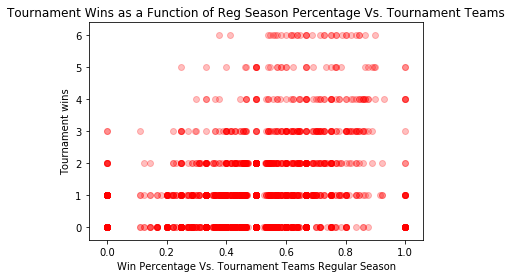

In [59]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = win_percentage_vs_tourney_teams_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams.astype(np.float)]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax2.scatter(pred_tourney_teams, wins_tourney_teams, color="red", alpha=.25)
    
ax2.set_xlabel("Win Percentage Vs. Tournament Teams Regular Season")
ax2.set_ylabel("Tournament wins")
ax2.set_title("Tournament Wins as a Function of Reg Season Percentage Vs. Tournament Teams")
plt.show()

As we can see there is only a very small correlation between the win percentage in the regular season and tournament wins, which is somewhat unexpected. However, we could think that teams which win in the tournament are "battle tested" and will have played serveral regular season games against good teams, leading to a low percentage of wins versus highly ranked teams. As such, we will consider total wins instead of win percentage.

3) <b> Good Wins (Wins vs. Tournament Teams)<b>

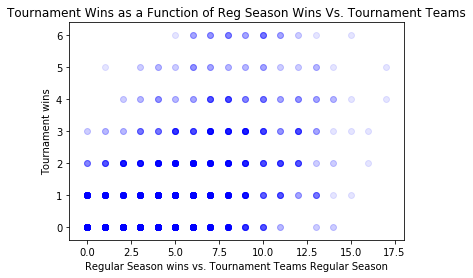

In [60]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = regular_wins_vs_tourney_teams_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams.astype(np.float)]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax3.scatter(pred_tourney_teams, wins_tourney_teams, color="blue", alpha=.1)
    
ax3.set_xlabel("Regular Season wins vs. Tournament Teams Regular Season")
ax3.set_ylabel("Tournament wins")
ax3.set_title("Tournament Wins as a Function of Reg Season Wins Vs. Tournament Teams")
plt.show()

This visualization of the number of tournament wins as a function of the number of wins against tournament teams in the regular season is very hard to interpret becuase of the discreteness in the graph. However, we do see a general trend of increasing tournament wins as regular season wins vs tournament teams increases. As such, we will need to use a more emperical approach to analyzing the effect of including this predictor in our model: namely, via cross validation down the road.

4) <b> Bad Losses (Losses to Non-Tournament Teams)</b>

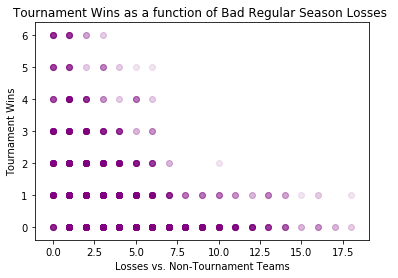

In [61]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = bad_losses_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams.astype(np.float)]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax4.scatter(pred_tourney_teams, wins_tourney_teams, color="purple", alpha=.1)
    
ax4.set_xlabel("Losses vs. Non-Tournament Teams")
ax4.set_ylabel("Tournament Wins")
ax4.set_title("Tournament Wins as a function of Bad Regular Season Losses ")
plt.show()

As we can see, there is a strong negative correlation between tournament wins and losses to non-tournament teams in the regular season. Thus, the predictor of "Bad Losses" should probably be in our model, subject to our empircial tests using cross validation. Teams with a low number of bad losses are more likely to win tournament games.

5) <b>Consistency (Std. of Score Diffential)</b>

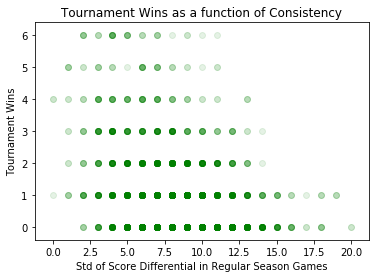

In [62]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)

std_score_diff_matrix = pd.read_csv("datasets/our_data/regular_season_std_score_differential_matrix", index_col=0)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = std_score_diff_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax5.scatter(pred_tourney_teams, wins_tourney_teams, color="green", alpha=.1)
    
ax5.set_xlabel("Std of Score Differential in Regular Season Games")
ax5.set_ylabel("Tournament Wins")
ax5.set_title("Tournament Wins as a function of Consistency")
plt.show()

This visualization of the number of tournament wins as a function of the consistency (std of score differential) in the regular season is hard to interpret becuase of the discreteness in the graph. There does appear to be a trend that teams with low standard deviations tend to do better than those with higher deviations, but it is hard to tell. As such, we will need to use a more emperical approach to analyzing the effect of including this predictor in our model: namely, via cross validation down the road.

6) <b>Dominance (Avg. Score Diffential)</b>

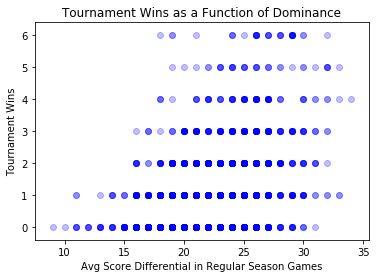

In [63]:
fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
avg_score_diff_matrix = pd.read_csv("datasets/our_data/regular_season_avg_score_differential_matrix", index_col=0)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = avg_score_diff_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax6.scatter(pred_tourney_teams, wins_tourney_teams, color="blue", alpha=.25)
    
ax6.set_xlabel("Avg Score Differential in Regular Season Games")
ax6.set_ylabel("Tournament Wins")
ax6.set_title("Tournament Wins as a Function of Dominance")
plt.show()

As we can see, there appears to be a slight correlation between tournament wins and a teams ability to dominate in the regular season, where domination is measured by the average score differential in the regular season. Qualitatively, we would expect this to happen, so it makes sense for us to try to include this in our model. Obviously, the inclusion of this in the model is subject to cross validation, as there may be confounding variables that are not present.

7) <b>Away Wins</b>

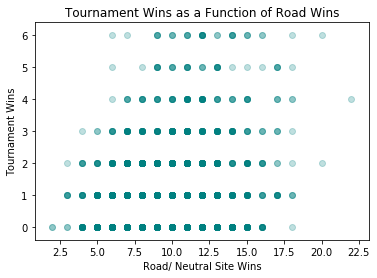

In [64]:
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
away_wins_matrix = pd.read_csv("datasets/our_data/away_wins_matrix", index_col=0)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = away_wins_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax7.scatter(pred_tourney_teams, wins_tourney_teams, color="Teal", alpha=.25)
    
ax7.set_xlabel("Road/ Neutral Site Wins")
ax7.set_ylabel("Tournament Wins")
ax7.set_title("Tournament Wins as a Function of Road Wins")
plt.show()

As we can see, there is a very very slight coorelation between away wins and tournament wins. However, it is somewhat hard to visualize the relationship becuase of the discretness, so we should consider empirical approaches such as CV before rejecting Road Wins from the Model. Further, we should also consider "tough wins," which are road wins against tournament teams.

8) <b>Tough Wins (Road Wins vs. Tournament Teams)</b>

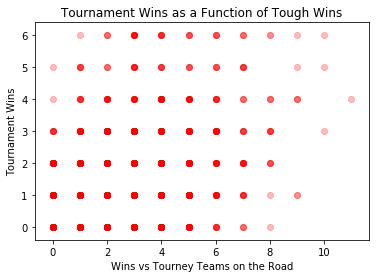

In [65]:
fig8 = plt.figure()
ax8 = fig8.add_subplot(111)
tough_wins_matrix = pd.read_csv("datasets/our_data/tough_wins_matrix", index_col=0)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = tough_wins_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax8.scatter(pred_tourney_teams, wins_tourney_teams, color="Red", alpha=.25)
    
ax8.set_xlabel("Wins vs Tourney Teams on the Road")
ax8.set_ylabel("Tournament Wins")
ax8.set_title("Tournament Wins as a Function of Tough Wins")
plt.show()

Once Again, due to the discreteness in the graph, it is hard to visualize the relationship between tournament wins and tough regular season wins (road wins vs tournament teams). As such, we would consider using an empircial approach (such as CV) to understand the importance of this predictor. Since we qualitiatively understand that this metric should be a predictor, since winning games against top teams on the road should relate to tournament wins. Thus, we will put this predictor under further review.

9) <b>Defensive Prowess (Avg Points Against) </b>

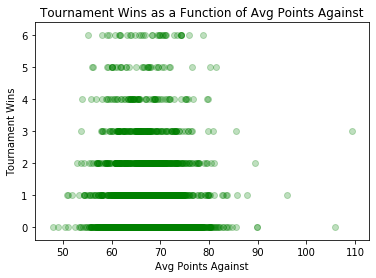

In [66]:
fig9 = plt.figure()
ax9 = fig9.add_subplot(111)
avg_points_against = pd.read_csv("datasets/our_data/avg_points_against", index_col=0)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = avg_points_against.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax9.scatter(pred_tourney_teams, wins_tourney_teams, color="Green", alpha=.25)
    
ax9.set_xlabel("Avg Points Against")
ax9.set_ylabel("Tournament Wins")
ax9.set_title("Tournament Wins as a Function of Avg Points Against")
plt.show()

There does not seem to be any soorelation between average points against and tournament wins. This makes sense, becuase defensive teams and offensive teams can both be successful in the tournament. However, we should still test this predictor with cross validation.

10) <b>Offensive Prowess (Avg Points Per Game)</b>

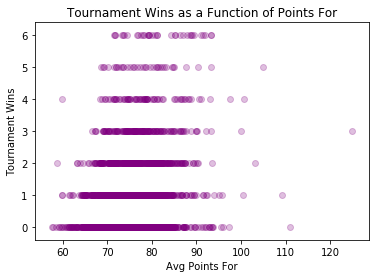

In [67]:
fig10 = plt.figure()
ax10 = fig10.add_subplot(111)
avg_points_for = pd.read_csv("datasets/our_data/avg_points_for", index_col=0)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = avg_points_for.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax10.scatter(pred_tourney_teams, wins_tourney_teams, color="Purple", alpha=.25)
    
ax10.set_xlabel("Avg Points For")
ax10.set_ylabel("Tournament Wins")
ax10.set_title("Tournament Wins as a Function of Points For")
plt.show()

There does not seem to be any coorelation between average points for and tournament wins. This makes sense, becuase defensive teams and offensive teams can both be successful in the tournament. However, we should still test this predictor with cross validation.

11) <b> Regular Season Win Percentage </b>

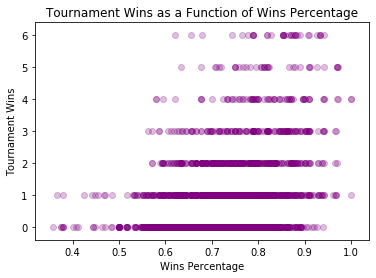

In [68]:
fig11 = plt.figure()
ax11 = fig11.add_subplot(111)
regular_season_win_pct = pd.read_csv('datasets/our_data/regular_season_win_percentage_matrix', index_col=0)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = regular_season_win_pct.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax11.scatter(pred_tourney_teams, wins_tourney_teams, color="Purple", alpha=.25)
    
ax11.set_xlabel("Wins Percentage")
ax11.set_ylabel("Tournament Wins")
ax11.set_title("Tournament Wins as a Function of Wins Percentage")
plt.show()

This graph plots tournament wins as a function of regular season win percentage. We see that nearly all teams in the tournament have regular season win percentages above 50%. And while some teams can make it to the final four with win percentages below 70%, none have managed to win the tournament. Conversely, we see that there are a number of teams with regular season win percentages above 95%. However, none of those teams ended up winning the ship. In fact, only one or two of them made it to the final four. This could occur because of teams in weak conferences breezing through an easy regular season schedule. It could also be indicative of a team that hasn't faced adversity. 